In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
print("Setup Complete")


/tmp/ipykernel_23104/547731278.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Setup Complete


In [ ]:
# Load 2025 data from CSV
# Note: Data must be manually collected from FT website due to access restrictions
# See MANUAL_DATA_COLLECTION.md for instructions

import pandas as pd
import os

data_file = 'data/ft1000_2025.csv'

if not os.path.exists(data_file):
    print(f"ERROR: Data file not found: {data_file}")
    print("Please collect data manually (see MANUAL_DATA_COLLECTION.md)")
    print("Using template data for demonstration...")
    data_file = 'data/ft1000_2025_template.csv'

# Read the CSV - adjust column names as needed based on actual data
df_raw = pd.read_csv(data_file)
print(f"Loaded {len(df_raw)} companies")
print(f"Columns: {df_raw.columns.tolist()}")
df_raw.head()

In [3]:
companyNames = []
countries = []
categories = []
absoluteGrowthRates = []
numberOfEmployees = []
revenue21 = []

for row in soup.findAll('table')[0].tbody.findAll('tr')[1:]:
    companyName = row.findAll('td')[1].get_text()
    companyNames.append(companyName)
    
for row in soup.findAll('table')[0].tbody.findAll('tr')[1:]:
    country = row.findAll('td')[4].get_text()
    countries.append(country)
    
for row in soup.findAll('table')[0].tbody.findAll('tr')[1:]:
    category = row.findAll('td')[5].get_text()
    categories.append(category)
    
for row in soup.findAll('table')[0].tbody.findAll('tr')[1:]:
    absoluteGrowthRate = row.findAll('td')[6].get_text().replace(",","")[:-1]
    absoluteGrowthRates.append(float(absoluteGrowthRate))
    
for row in soup.findAll('table')[0].tbody.findAll('tr')[1:]:
    revenues21 = row.findAll('td')[8].get_text().replace(",","")
    revenue21.append(float(revenues21))
    
for row in soup.findAll('table')[0].tbody.findAll('tr')[1:]:
    numberOfEmployee = row.findAll('td')[10].get_text()
    numberOfEmployees.append(float(numberOfEmployee.replace(',', '') if numberOfEmployee != 'n/a' else 'nan'))
    


In [4]:
companyDict = {"companyNames":companyNames, "countries": countries, "categories":categories, "absoluteGrowthRates": absoluteGrowthRates, "numberOfEmployees":numberOfEmployees, "revenue 2021":revenue21}
companyRates_df = pd.DataFrame.from_dict(companyDict)  

In [5]:
companyRates_df.describe()

,absoluteGrowthRates,numberOfEmployees,revenue 2021
count,999.000000,999.000000,9.990000e+02
mean,713.073073,112.713714,3.587984e+07
std,1828.788484,554.479223,2.087860e+08
min,152.000000,1.000000,1.517665e+06
25%,209.500000,14.000000,3.914920e+06
50%,322.000000,33.000000,8.379884e+06
75%,622.500000,85.000000,2.166319e+07
max,43771.000000,16413.000000,5.993400e+09


In [6]:
companyRates_df.countries.value_counts().nlargest(10)

countries
Italy              260
Germany            217
UK                 153
France             137
Poland              48
Spain               38
Sweden              17
Hungary             14
The Netherlands     14
Lithuania           11
Name: count, dtype: int64

In [7]:
mean_vals = companyRates_df.groupby("countries").absoluteGrowthRates.mean()
tenBest = mean_vals.nlargest(10)
print(tenBest)

countries
Croatia            1676.600000
Estonia            1361.000000
The Netherlands    1221.285714
UK                 1184.444444
Lithuania          1125.272727
Greece              948.500000
Czech Republic      897.900000
Switzerland         882.000000
Norway              850.000000
Denmark             793.714286
Name: absoluteGrowthRates, dtype: float64


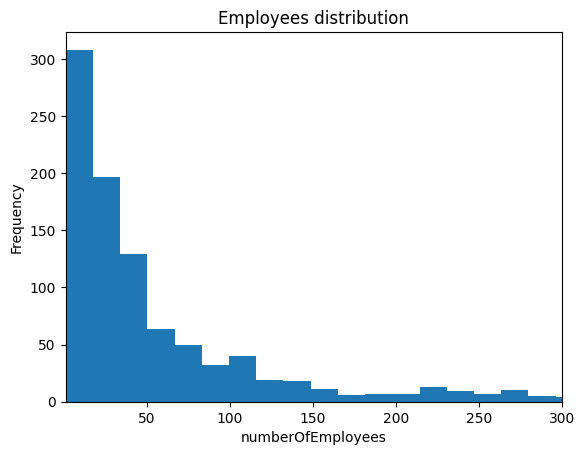

In [8]:
plt.hist(companyRates_df.numberOfEmployees, bins=1000)
plt.title("Employees distribution")
plt.xlabel("numberOfEmployees")
plt.ylabel("Frequency")
plt.xlim(1, 300)
plt.show()

/tmp/ipykernel_23104/3394302375.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  category_type = pd.value_counts(companyRates_df['categories'].values, sort=True)


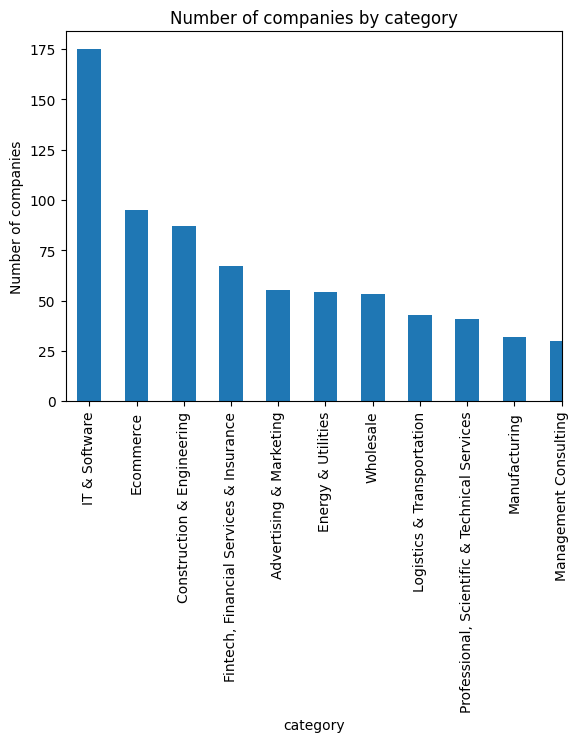

In [9]:
category_type = pd.value_counts(companyRates_df['categories'].values, sort=True)

ax = category_type.plot(kind='bar', title='Number of companies by category')
ax.set(xlabel='category', ylabel='Number of companies')
plt.xlim(right=10)
plt.show()

/tmp/ipykernel_23104/1985702278.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  category_type = pd.value_counts(italianCompanies_df['categories'].values, sort=True)


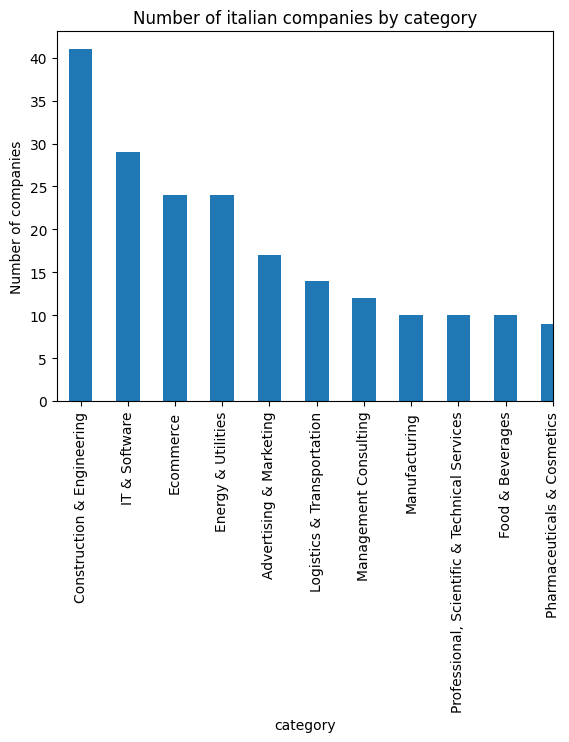

In [10]:
italianCompanies =  companyRates_df['countries']=="Italy"
italianCompanies_df = companyRates_df[italianCompanies]

category_type = pd.value_counts(italianCompanies_df['categories'].values, sort=True)

ax = category_type.plot(kind='bar', title='Number of italian companies by category')
ax.set(xlabel='category', ylabel='Number of companies')
plt.xlim(right=10)
plt.show()

In [11]:
italianCompanies_df[italianCompanies_df['categories']=="IT & Software"].sort_values(by=['absoluteGrowthRates'], ascending=False)

,companyNames,countries,categories,absoluteGrowthRates,numberOfEmployees,revenue 2021
18,DOTX (Senso),Italy,IT & Software,4590.0,27.0,17757458.0
59,Babylon Cloud,Italy,IT & Software,2036.0,32.0,2305239.0
142,Taste,Italy,IT & Software,1017.0,14.0,2102406.0
195,I’mprinting,Italy,IT & Software,768.0,19.0,11580776.0
213,Contrader,Italy,IT & Software,719.0,57.0,10854129.0
237,Edu Group,Italy,IT & Software,656.0,3.0,30806768.0
279,Digital Attitude,Italy,IT & Software,553.0,13.0,1880402.0
301,Innonation,Italy,IT & Software,508.0,8.0,1828298.0
324,Hyntelo,Italy,IT & Software,460.0,34.0,6399432.0
340,Qapla,Italy,IT & Software,446.0,39.0,1560712.0


In [12]:
mean_vals = companyRates_df.groupby("categories").numberOfEmployees.mean()
tenBest = mean_vals.nlargest(10)
print(tenBest)

categories
Food & Beverages                                 694.076923
Employment Services                              322.086957
Legal & Accounting Services                      251.000000
Media & Telecommunications                       161.722222
Logistics & Transportation                       159.534884
Health Care & Life Sciences                      156.400000
Fintech, Financial Services & Insurance          155.701493
Aerospace & Defence                              150.000000
Professional, Scientific & Technical Services    149.682927
IT & Software                                    121.028571
Name: numberOfEmployees, dtype: float64


In [13]:
mean_vals = companyRates_df.groupby("categories").absoluteGrowthRates.mean()
tenBest = mean_vals.nlargest(10)
print(tenBest)

categories
Leisure & Entertainment                          1962.833333
Fintech, Financial Services & Insurance          1385.910448
Manufacturing                                    1142.843750
Electrical Manufacturing                         1110.000000
Retail                                           1052.444444
Hospitality & Travel                             1033.571429
Pharmaceuticals & Cosmetics                       997.857143
Professional, Scientific & Technical Services     992.804878
Legal & Accounting Services                       982.666667
Education & Social Services                       805.576923
Name: absoluteGrowthRates, dtype: float64


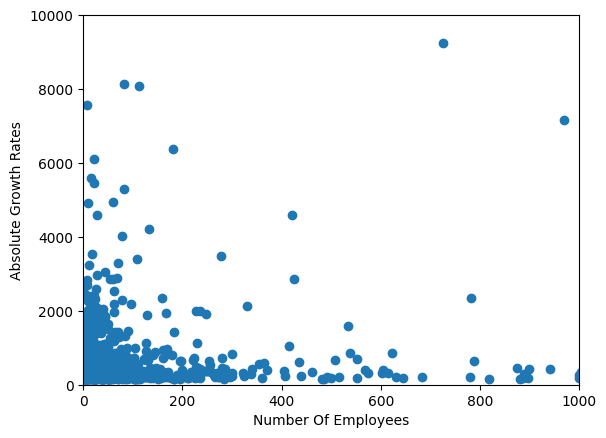

In [14]:
plt.scatter(companyRates_df.numberOfEmployees, companyRates_df.absoluteGrowthRates)
plt.axis([0, 1000, 0, 10000])
plt.xlabel('Number Of Employees')
plt.ylabel('Absolute Growth Rates')

plt.show()

<Axes: >

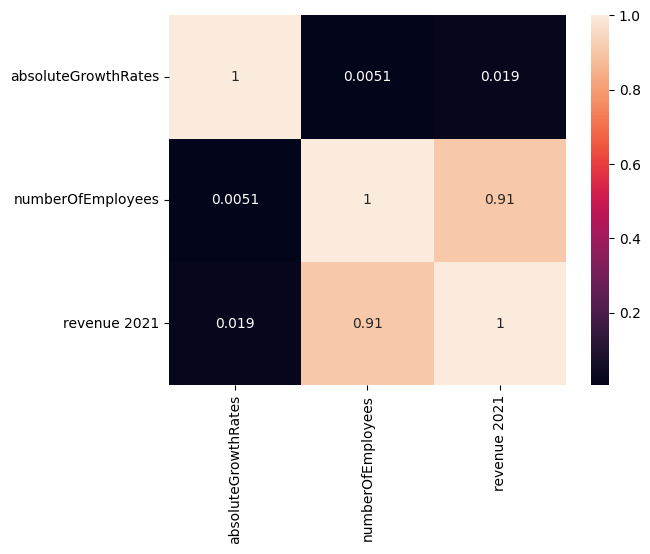

In [15]:
Var_Corr = companyRates_df.corr(method='pearson', min_periods=1, numeric_only=True)
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
